In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

In [5]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [8]:
features = pd.get_dummies(raw_data)

In [9]:
features['rating2'] = np.where(raw_data['rating'] >= 1.2, 1, 0)

In [10]:
print(raw_data['rating'].groupby(features['rating2']).describe())

           count     mean       std   min   25%    50%    75%  max
rating2                                                           
0         1836.0  0.00000  0.000000  0.00  0.00  0.000  0.000  0.0
1        18216.0  4.08885  0.669443  1.25  3.75  4.375  4.375  5.0


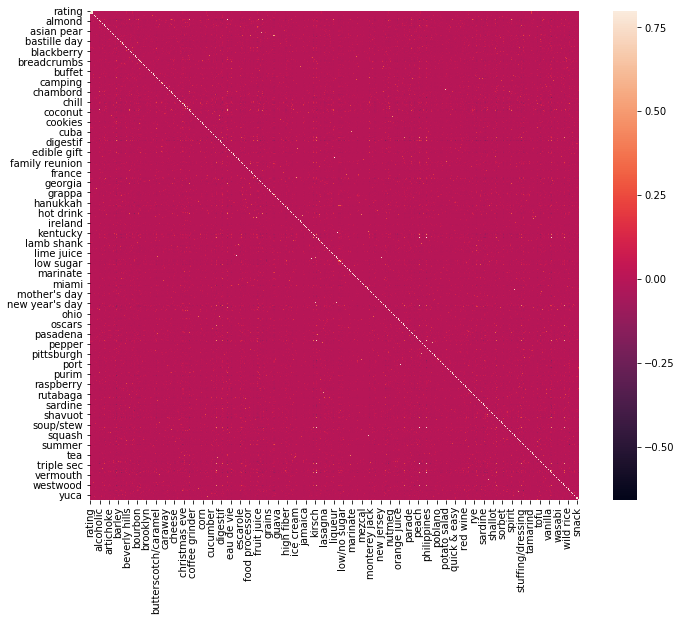

              chambord     chill   bourbon  vermouth  triple sec       tea  \
chambord      1.000000  0.009173 -0.002167 -0.000641    0.085077 -0.002032   
chill         0.009173  1.000000  0.005451  0.003537   -0.001692  0.020010   
bourbon      -0.002167  0.005451  1.000000  0.106384   -0.005013  0.019853   
vermouth     -0.000641  0.003537  0.106384  1.000000   -0.001483 -0.001740   
triple sec    0.085077 -0.001692 -0.005013 -0.001483    1.000000 -0.004701   
tea          -0.002032  0.020010  0.019853 -0.001740   -0.004701  1.000000   
liqueur       0.055026  0.017712  0.020440  0.014105    0.182251  0.001413   
cucumber     -0.003798  0.047274 -0.010993 -0.003252    0.002835 -0.000392   
fruit juice   0.043028 -0.021654  0.040946 -0.003700    0.077284  0.062758   
kentucky     -0.000335  0.014728  0.050837 -0.000287   -0.000774 -0.000909   
spirit       -0.002875 -0.017294  0.077025  0.038522    0.077079  0.044165   
grappa       -0.000386 -0.003445 -0.001119 -0.000331   -0.000894

In [10]:
corrmat = raw_data.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [12]:
from sklearn.svm import SVC

# Instantiate our model and fit the data.
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = features.rating2
svm = SVC(kernel = 'linear')
svm.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
svm.score(X, Y)

0.91831238779174151

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm, X, Y, cv=5)

array([ 0.91425723,  0.91670823,  0.9159601 ,  0.91695761,  0.91471322])

**Selection bias is very evident in this dataset. Since review aren't solicited, and are passively accepted, there is no way to assure a representative population sample.  Additionally, the reviews are from one site, so there is bias in that the only reviewers are direct users of the site.**